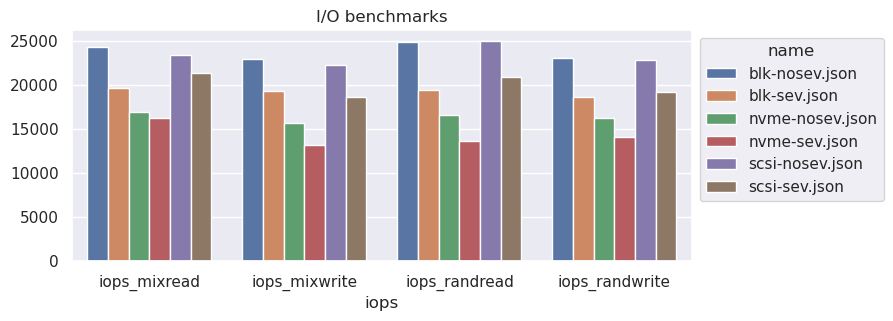

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# for container in ax.containers:
#     ax.bar_label(container, fmt='%.1f')
df=pd.read_csv("iops_results.csv")
df = df.sort_values(['group', 'name'],ascending = [True, True])
sns.set(rc={'figure.figsize':(8,3)})
ax=sns.barplot(df, x="group",y="result",hue="name",orient="v", width=0.8)
ax.set(xlabel ="iops", ylabel = "", title ='I/O benchmarks')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

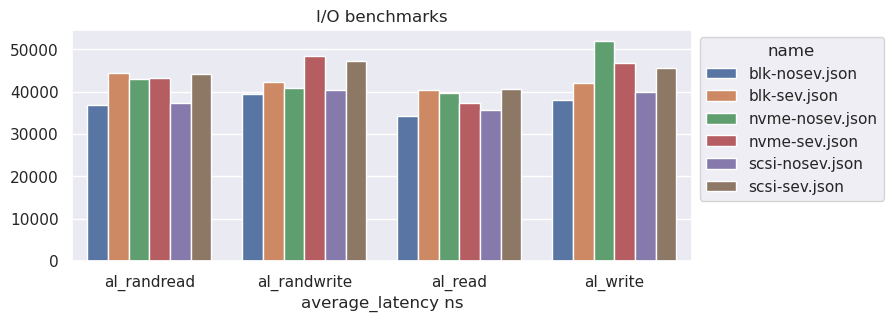

In [2]:
df=pd.read_csv("al_results.csv")
df = df.sort_values(['group', 'name'],ascending = [True, True])
sns.set(rc={'figure.figsize':(8,3)})
ax=sns.barplot(df, x="group",y="result",hue="name",orient="v", width=0.8)
ax.set(xlabel ="average_latency ns", ylabel = "", title ='I/O benchmarks')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

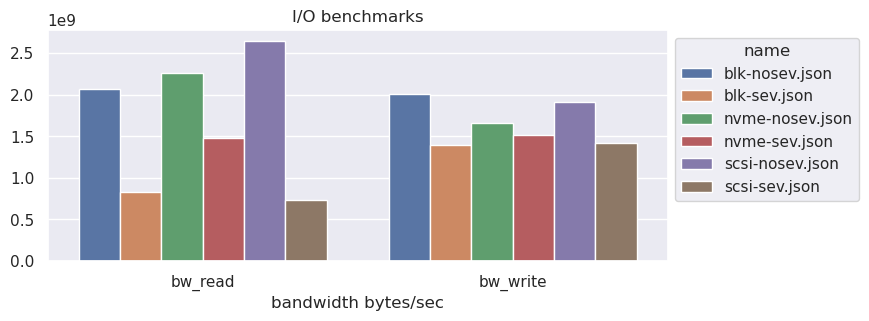

In [3]:
df=pd.read_csv("bw_results.csv")
df = df.sort_values(['group', 'name'],ascending = [True, True])
sns.set(rc={'figure.figsize':(8,3)})
ax=sns.barplot(df, x="group",y="result",hue="name",orient="v", width=0.8)
ax.set(xlabel ="bandwidth bytes/sec", ylabel = "", title ='I/O benchmarks')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib
sns.set(font_scale=0.5)

sns.set(rc={'figure.figsize':(2,2)})
def plot(filename,title):
    df=pd.read_csv(filename)
    avg_df = df.groupby('benchmark_name')['benchmark_result'].mean().reset_index()
    g1=sns.barplot(data=avg_df,x='benchmark_name', y='benchmark_result',orient="vertical")
    g1.set(xlabel=None)
    g1.set(ylabel=None)
    plt.legend([],[], frameon=False)
    plt.margins(y=1)
    g1.bar_label(g1.containers[0], label_type='edge')
    plt.title(title)
    plt.show()

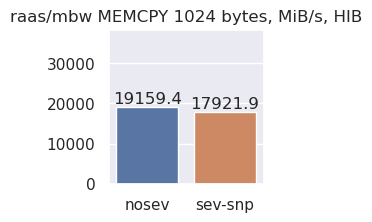

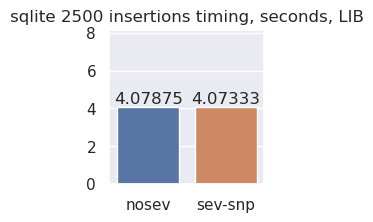

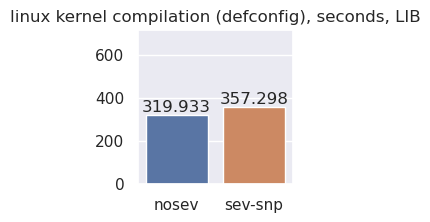

In [5]:
plot("memory.csv","raas/mbw MEMCPY 1024 bytes, MiB/s, HIB")
plot("io.csv","sqlite 2500 insertions timing, seconds, LIB")
plot("compilation.csv","linux kernel compilation (defconfig), seconds, LIB")